In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 01

In [ ]:
#loading the pizza and the cake
cake = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab3/Input/Q1/cake.jpeg')
cake = cv2.cvtColor(cake,cv2.COLOR_BGR2RGB)
pizza = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab3/Input/Q1/pizza.jpeg')
pizza = cv2.cvtColor(pizza,cv2.COLOR_BGR2RGB)

In [ ]:
# Creating various functions to use it for multiple images


def display_rgb(image):
  #loading the image
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  #displaying the main image
  plt.imshow(image)

def display_corner(image):
  #loading the grayscale image
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  gray = np.float32(gray)

  #Detecting corner
  dst = cv2.cornerHarris(gray, 2, 3, 0.04)

  #Enhancing corner
  dst = cv2.dilate(dst,None)

  #Displaying the corner points
  plt.imshow(dst, cmap='gray')
  display_rgb(pizza)

  return dst

def display_strong_corners(image,dst):
  #Selecting how many corners to detect
  threshold = 0.1*dst.max()


  corner_image = np.copy(image)

  #Drawing corner lines by using the points
  for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > threshold):
            cv2.circle( corner_image, (i, j), 1, (0,255,255), 1)

  #Displayin the corner lines
  plt.imshow(corner_image)

def display_gradient(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  #Computing Gradients
  grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
  grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

  #Computing gradient magnitude
  magnitude = np.sqrt(grad_x**2 + grad_y**2)

  #Normalizing Gradient Magnitude
  magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)


  plt.figure(figsize=(10, 5))
  plt.subplot(1, 3, 1)
  plt.title("Gradient in X Direction")
  plt.imshow(grad_x, cmap='gray')
  plt.subplot(1, 3, 2)
  plt.title("Gradient in Y Direction")
  plt.imshow(grad_y, cmap='gray')
  plt.subplot(1, 3, 3)
  plt.title("Gradient Magnitude")
  plt.imshow(magnitude, cmap='gray')
  plt.show()

  return (gray,magnitude)

def display_haris_corner(image,gray,magnitude):
  dst = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
  dst = cv2.dilate(dst, None)

  # Threshold to find strong corners
  threshold = 0.01 * dst.max()
  corners = dst > threshold


  overlay = np.copy(magnitude)
  overlay[corners] = 255

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Gradient Magnitude")
  plt.imshow(magnitude, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.title("Corners Overlay on Gradients")
  plt.imshow(overlay, cmap='gray')
  plt.show()

In [ ]:
def display_main(image):
  #Copying the main image for usage
  image = np.copy(image)

  #Displaying the Original image in RGB
  display_rgb(image)

  #Displaying the corner points and fetching them
  dst = display_corner(image)

  #Displaying the stromh corner points
  display_strong_corners(image,dst)

  #Displaying the gradient lines
  gray, magnitude = display_gradient(image)

  #Displaying the Haris corners of the object
  display_haris_corner(image,gray,magnitude)


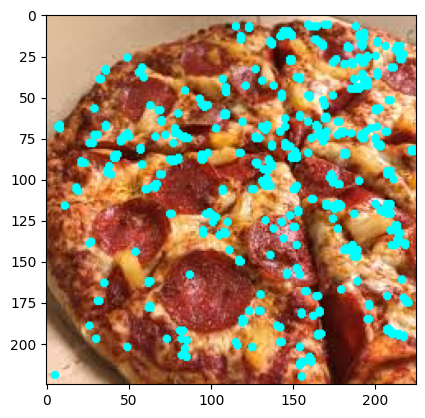

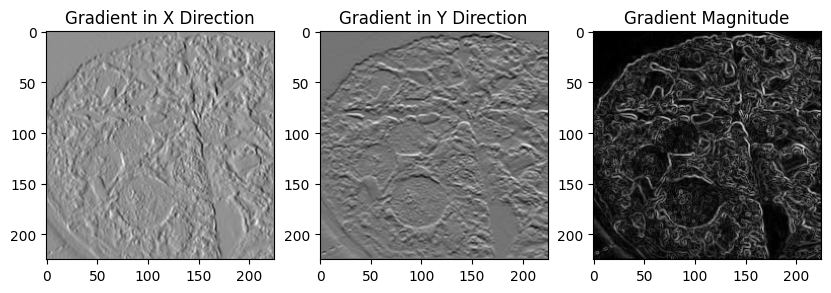

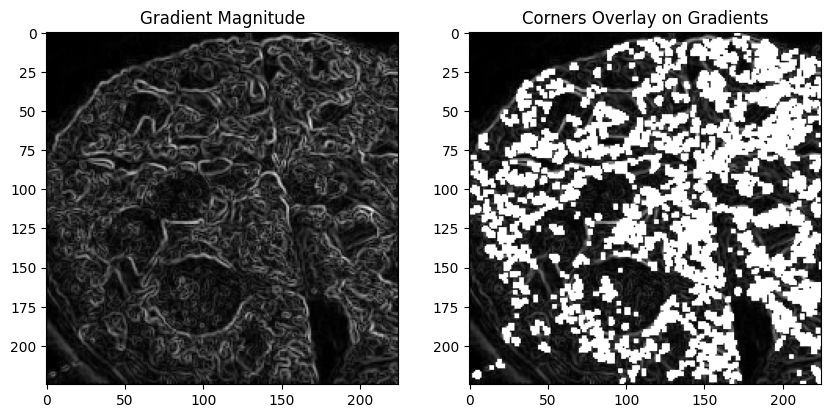

In [ ]:
display_main(pizza)

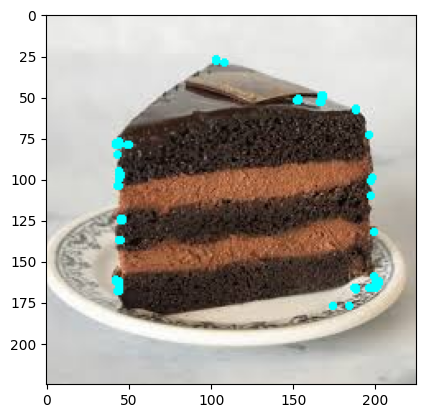

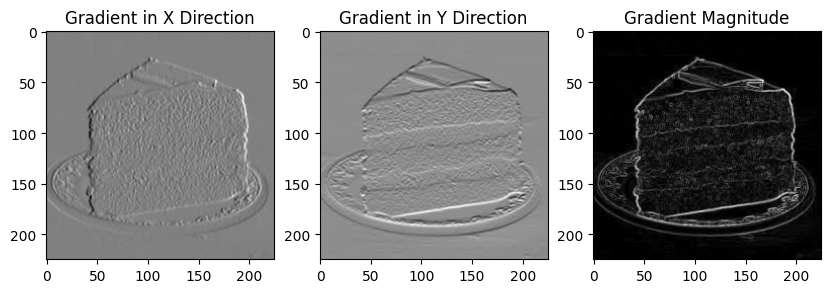

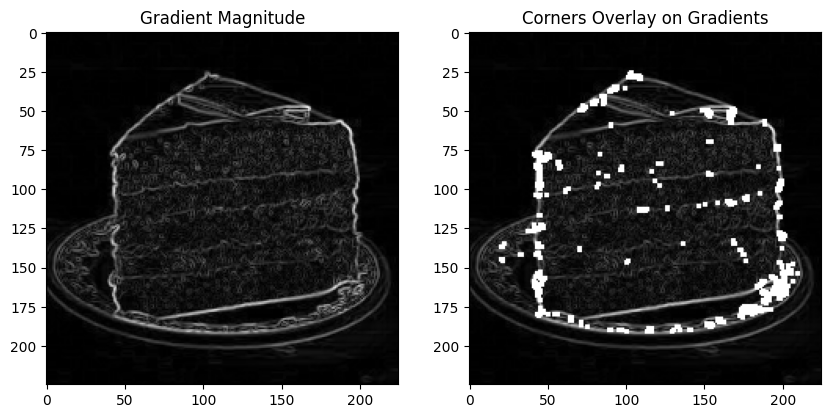

In [ ]:
display_main(cake)

* Analyzing Results

  * It doesn't detect the pepperoni slices properly and is very inconsistent.

  * Yes, They are identified as corners.

  * It counts the cheese texture as edge/corners.

* Analyzin Algorithm Behaviour  
  * The algorithm struggles with circular shapes or irregular toppings because it has a comtinous edge without any angular distinction which has a very low gradient

  * Foods with sharp edges make it easier for harris corner detection as it has a high gradient with distinct corners.

#Question 02

## PART 01

In [8]:
cat = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab3/Input/Q2/cat.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

In [39]:
# The Shrinking Spell
width = int(cat.shape[1] * 0.35)
height = int(cat.shape[0] * 0.35)
dim = (width, height)
shrinked_cat = cv2.resize(cat, dim, interpolation = cv2.INTER_AREA)


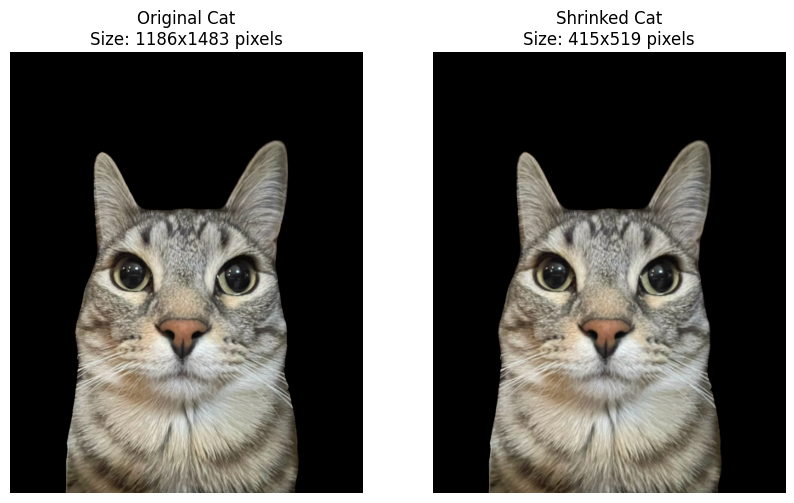

In [40]:
plt.figure(figsize=(10,7))


plt.subplot(1,2,1)
plt.imshow(cat)
plt.title(f'Original Cat\nSize: {cat.shape[1]}x{cat.shape[0]} pixels')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(shrinked_cat)
plt.title(f'Shrinked Cat\nSize: {shrinked_cat.shape[1]}x{shrinked_cat.shape[0]} pixels')
plt.axis('off')

plt.show()


Text(0.5, 1.0, 'Teleported cat')

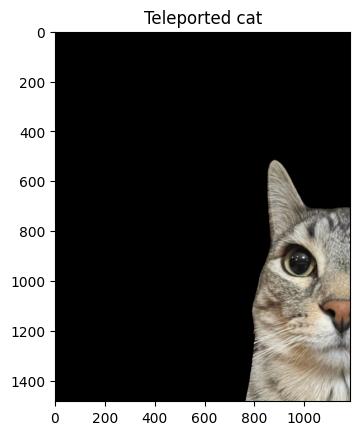

In [42]:
#The teleportation act

shift_x = 570
shift_y = 180

translation_matrix = np.float32([[1, 0, shift_x],
                                  [0, 1, shift_y]])

# Apply the translation
teleported_cat = cv2.warpAffine(cat, translation_matrix, (cat.shape[1], cat.shape[0]))

plt.imshow(teleported_cat)
plt.title('Teleported cat')

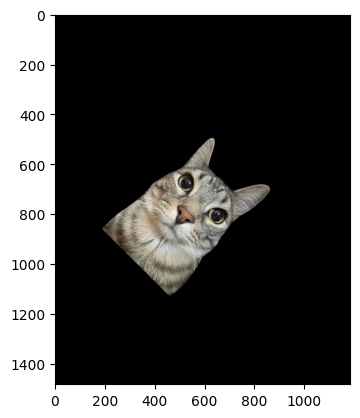

In [41]:
#The twisting tail move
rows,cols = cat.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45,0.5)
twisted_cat = cv2.warpAffine(cat,M,(cols,rows))
plt.imshow(twisted_cat)

(np.float64(-0.5), np.float64(1185.5), np.float64(1482.5), np.float64(-0.5))

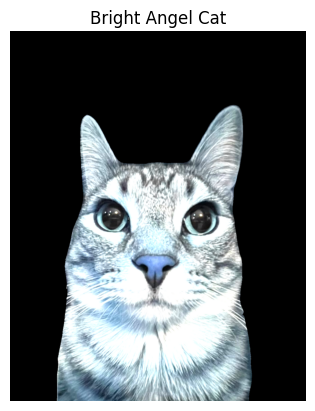

In [38]:
#The sunbeam glow
def brightness_augmentation(image, factor):
  adjusted_image = np.clip(image * factor, 0, 255).astype(np.uint8)
  return adjusted_image

bright_cat = brightness_augmentation(cat, 1.5)
plt.title('Bright Angel Cat')
plt.imshow(cv2.cvtColor(bright_cat, cv2.COLOR_BGR2RGB))
plt.axis('off')

## PART 02

In [43]:
transformed_cats = [shrinked_cat, teleported_cat, twisted_cat, bright_cat]

In [51]:
#Extracting key points and descriptor

sift = cv2.SIFT_create()

images = [cat] + transformed_cats
titles = ["Original Cat", "Shrinked Cat", "Teleported Cat", "Twisted Cat", "Bright Cat"]
def keypoints_descriptor(i,img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    keypoints, descriptors = sift.detectAndCompute(gray_img, None)


    keypoints_no_size = np.copy(img)
    cv2.drawKeypoints(img, keypoints, keypoints_no_size, color=(0, 255, 0))


    keypoints_with_size = np.copy(img)
    cv2.drawKeypoints(img, keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Plot images side by side
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].imshow(cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f"{titles[i]} - Keypoints with Size")
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(keypoints_no_size, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f"{titles[i]} - Keypoints without Size")
    axs[1].axis('off')

    plt.show()

    print(f"{titles[i]}: Number of keypoints detected = {len(keypoints)}")

for i, img in enumerate(images):
  keypoints_descriptor(i,img)

Output hidden; open in https://colab.research.google.com to view.

In [187]:
#Matching and visualizing key points
def keypoints_match(original_img, transformed_img,  transformed_title, max_matches=50):

    sift = cv2.SIFT_create()


    train_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    test_gray = cv2.cvtColor(transformed_img, cv2.COLOR_BGR2GRAY)


    train_kp, train_des = sift.detectAndCompute(train_gray, None)
    test_kp, test_des = sift.detectAndCompute(test_gray, None)


    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)


    matches = bf.match(train_des, test_des)

    matches = sorted(matches, key=lambda x: x.distance)


    matched_img = cv2.drawMatches(original_img, train_kp, transformed_img, test_kp,
                                  matches, transformed_img,
                                  flags=2)


    plt.figure(figsize=(14, 7))
    plt.rcParams['figure.figsize'] = [14.0, 7.0]
    plt.title('Best Matching Points between Real cat and '+ transformed_title)
    plt.imshow(matched_img)
    plt.show()
    plt.axis('off')
    plt.show()


    print(f"Number of Matching Keypoints between Real Cat and {transformed_title}: {len(matches)}")


for i in range(1, len(images)):
    keypoints_match(images[0], images[i], titles[i])


Output hidden; open in https://colab.research.google.com to view.

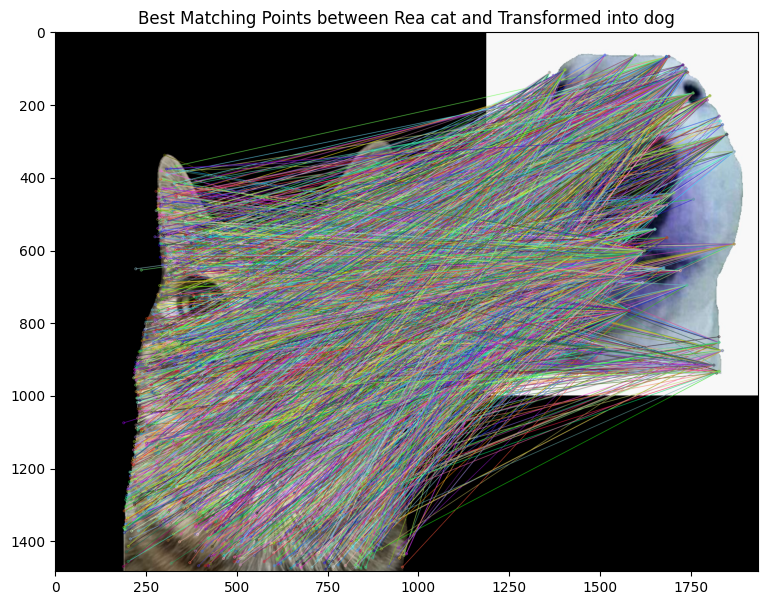

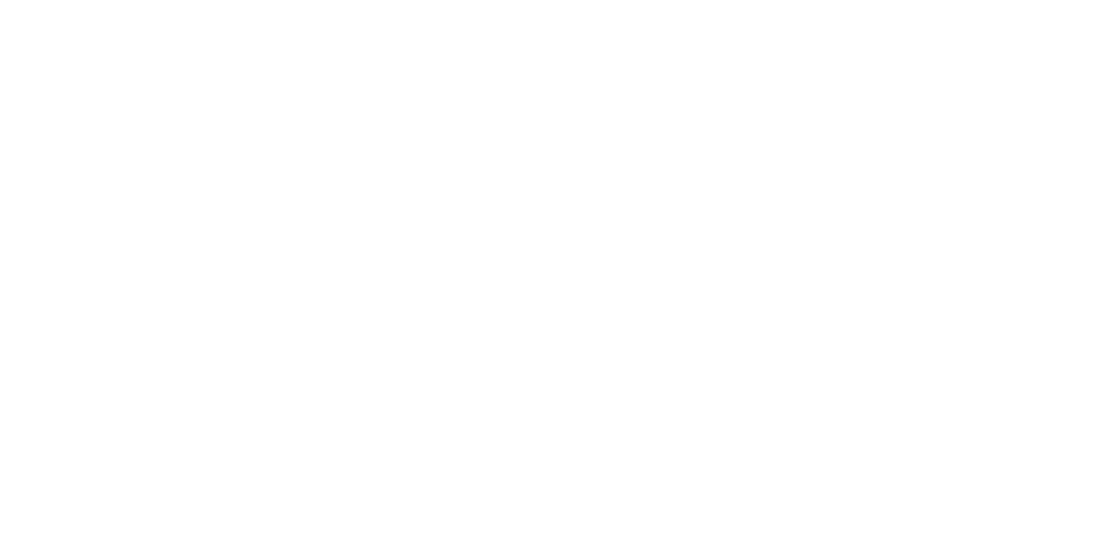

Number of Matching Keypoints between Real Cat and Transformed into dog: 3542


In [56]:
#Matching transformed dog
dog = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab3/Input/Q2/dog.jpg')

keypoints_match(cat, dog, 'Transformed into dog')


Yes, it confuses thetwo image and made irrelevant meaningless matches. SIFT cannot handle such devious change.

# Question 03

In [174]:
road = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab3/Input/Q3/road.jpg')
road = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)

* Intruction 01

In [175]:
gray_road = cv2.cvtColor(road, cv2.COLOR_RGB2GRAY)
g_blur_road = cv2.GaussianBlur(gray_road, (9, 9), sigmaX=2)

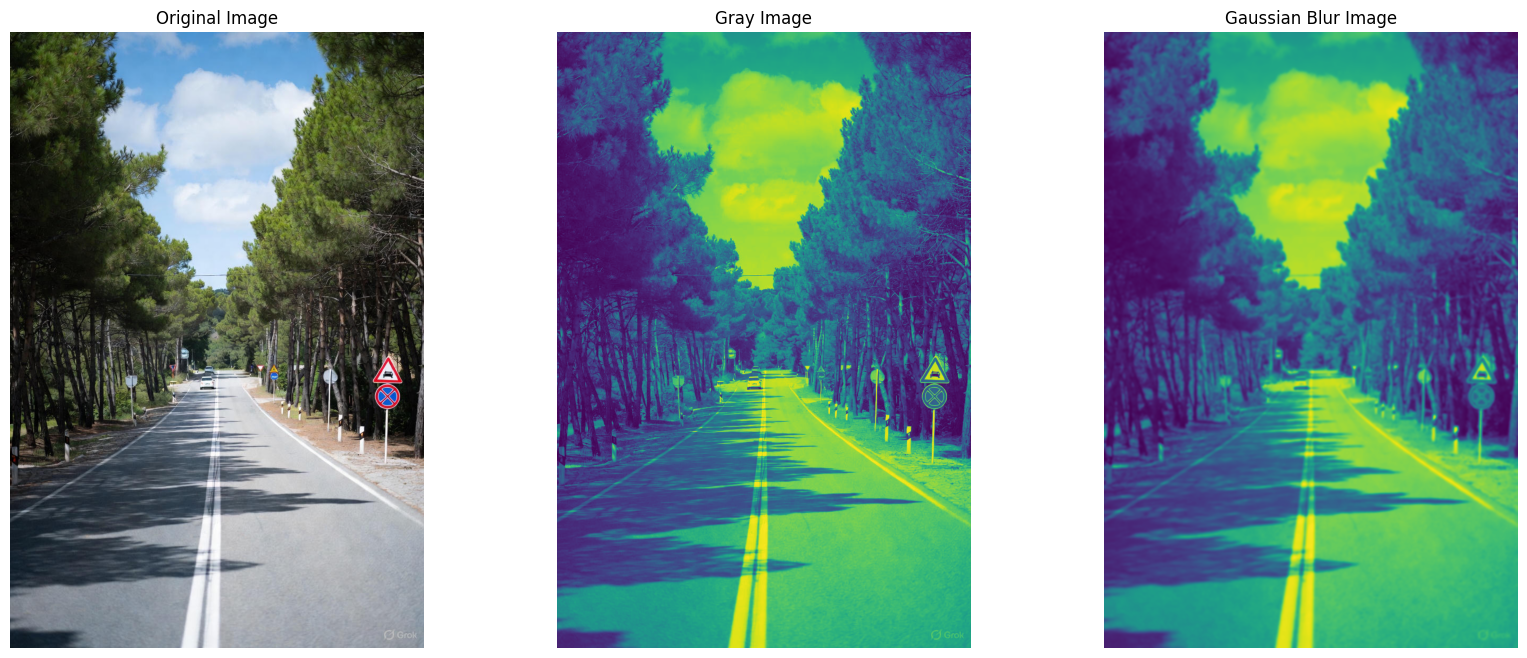

In [176]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(road)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Gray Image')
plt.imshow(gray_road)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Gaussian Blur Image')
plt.imshow(g_blur_road)
plt.axis('off')
plt.show()

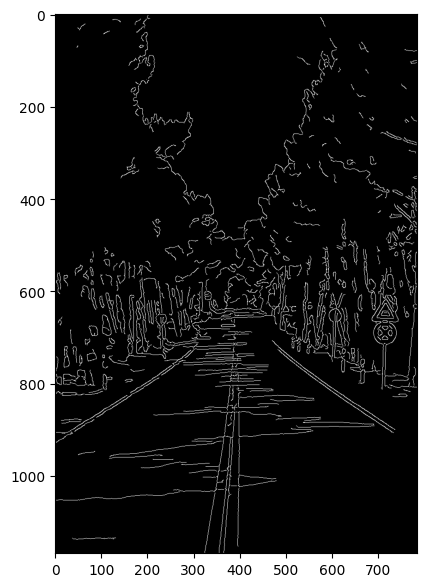

In [177]:
#Applying canny edge detection
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(g_blur_road, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

* Instruction 02

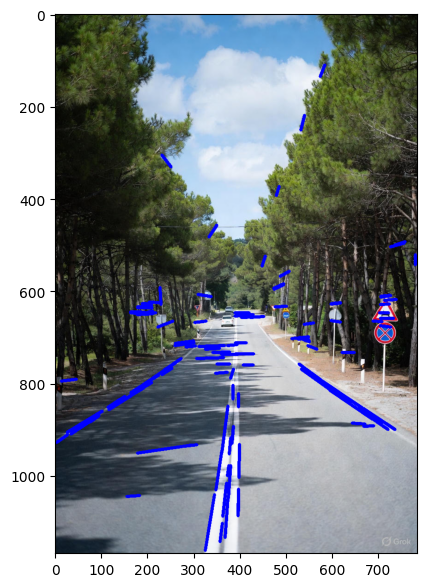

In [184]:
rho = 3
theta = np.pi/180
threshold = 200
min_line_length = 20
max_line_gap = 5
line_image = np.copy(road)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),5)

plt.imshow(line_image)

* Instruction 03

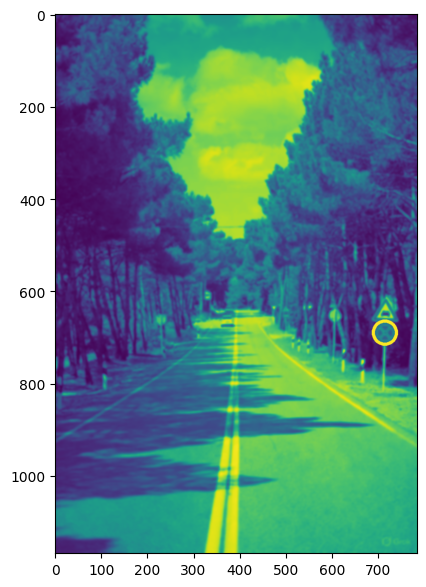

In [179]:
dp = 1.1
minDist = 80
param1 = 100
param2 = 50
minRadius = 15
maxRadius = 70
sign_image = np.copy(g_blur_road)
circles = cv2.HoughCircles(sign_image,cv2.HOUGH_GRADIENT, dp = dp, minDist=minDist, param1 = param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)


circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(sign_image, (i[0], i[1]), i[2], (255, 0, 0), 5)

plt.imshow(sign_image)

* Instruction 04

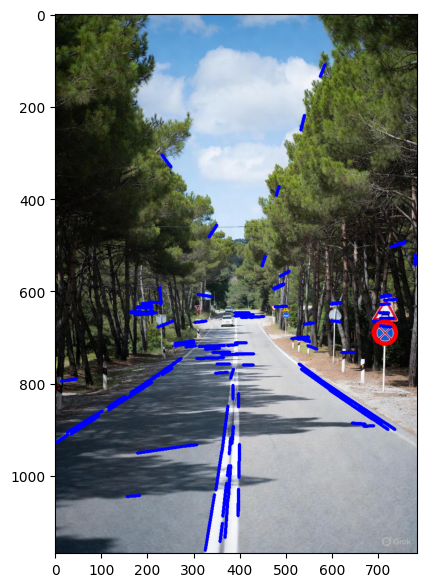

In [186]:

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(road,(x1,y1),(x2,y2),(0,0,255),5)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(road, (i[0], i[1]), i[2], (255, 0, 0), 5)

plt.imshow(road)